In [62]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates

#import warnings
#warnings.filterwarnings('ignore')

datadir = '../data/'

In [63]:
data_totalcases = pd.read_csv(datadir + 'total_cases.csv')
data_totaldeaths = pd.read_csv(datadir + 'total_deaths.csv')

AllCountries = [name for name in data_totalcases.keys() if name != 'date' and name != 'World']

datatime = time.ctime(os.path.getmtime(datadir + 'total_cases.csv'))
print(datatime)

Wed Mar 18 12:59:37 2020


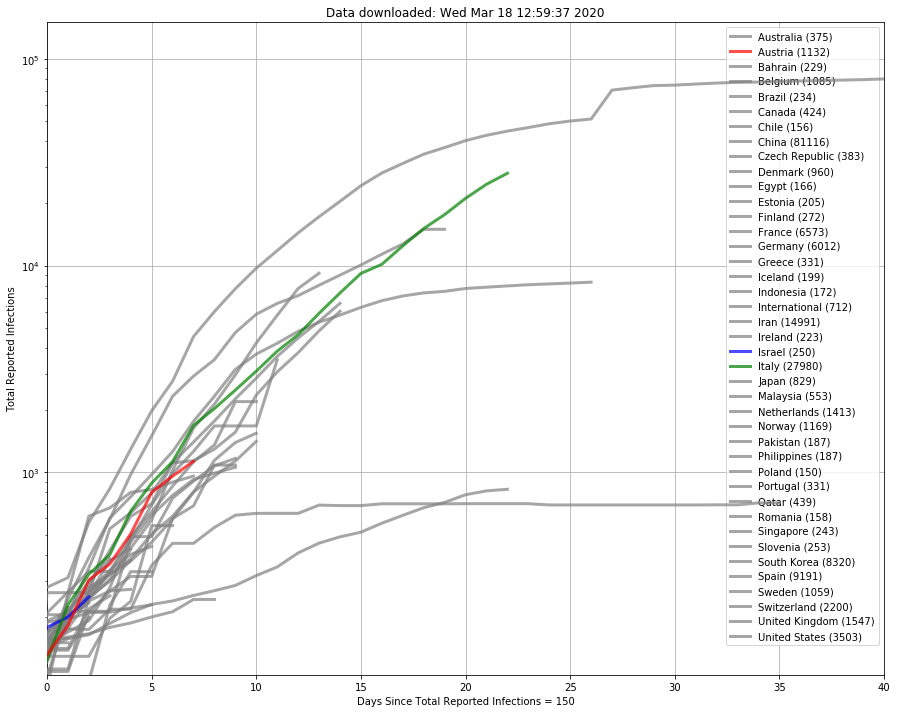

In [68]:

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days   = mdates.DayLocator()
years_fmt = mdates.DateFormatter('%Y-%M')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
x = np.arange(len(data_totalcases['date']))

threshold = 150

fig, ax = plt.subplots()

lgnd = []
for country in AllCountries:
    totinf = np.array(data_totalcases[country])
    if totinf[-1] >= threshold:
        startday = np.argmin((data_totalcases[country]-threshold)**2)
        lgnd.append(country + ' ({:.0f})'.format(totinf[-1]))
        c = 'gray'
        z = 100
        if country == 'Austria':
            c = 'red'
            z = 110
        elif country == 'Italy':
            c = 'green'
            z = 109
        elif country == 'Israel':
            c = 'blue'
            z = 108
        ax.plot(x - startday, data_totalcases[country], c = c, zorder = z, lw = 3, alpha = .7)

plt.legend(lgnd)
plt.xlim([0,40])
plt.ylim([threshold*.7,1.5e5])

plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.title('Data downloaded: ' + datatime)
plt.yscale('log')
plt.grid()